## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 



## Business Goal


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [2581]:
#importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2582]:
#reads data set to df variable
df=pd.read_csv("day.csv")

In [2583]:
#to get dimensions of data set
df.shape

(730, 16)

In [2584]:
#fetches top5 rowws of data set
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2585]:
#tocheck the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2586]:
#to know spread of variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2587]:
# To get the number of duplicate rows
df.duplicated( ).sum()

0

We don't have any duplicated rows.

In [2588]:
#to get count of null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We don't have any null values.

### Boxplot for continuous variables to check for outliers



<AxesSubplot:ylabel='hum'>

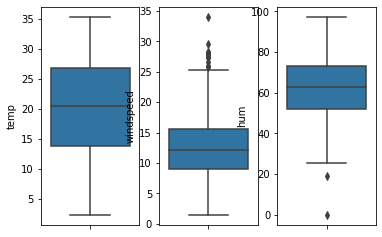

In [2589]:
#boxplot for continuous variables to check for outliers
plt.subplot(1,3,1)
sns.boxplot(y='temp', data=df)
plt.subplot(1,3,2)
sns.boxplot(y='windspeed', data=df)
plt.subplot(1,3,3)
sns.boxplot(y='hum', data=df)


we can see there are no outliers to handle.

### Dropping the unnecessary columns

 1)'instant' column it has nothing to do with target column
 2)'dtedate' as we already year and month column
 3)'casual' and 'registered' as these both represnted as sum in 'cnt'

In [2590]:
df=df.drop(['dteday','instant','casual','registered'],axis=1)

In [2591]:
df.shape

(730, 12)

### Corelation between features

<AxesSubplot:>

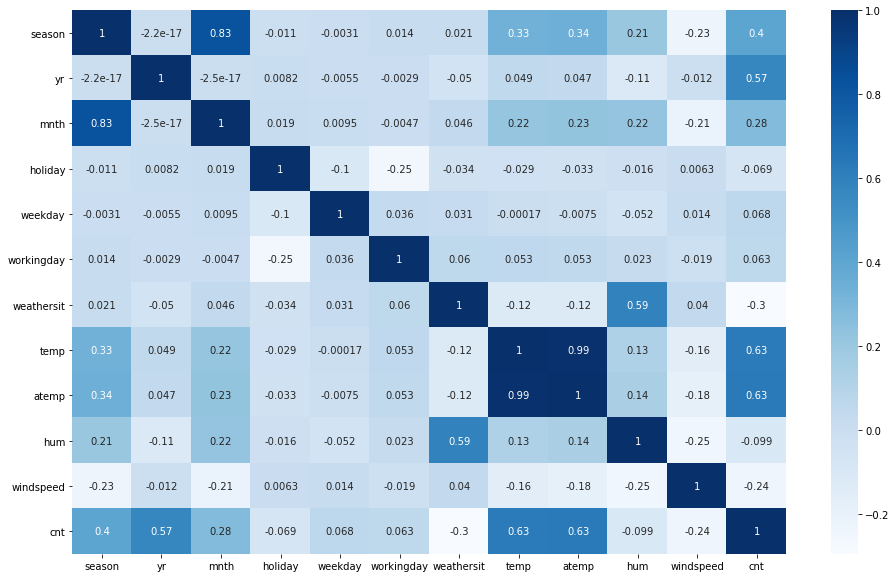

In [2592]:
plt.figure(figsize=(16,10))
sns.heatmap(data=df.corr(),annot=True,cmap="Blues")

### Continuous variables relation with Count

<Figure size 1728x1152 with 0 Axes>

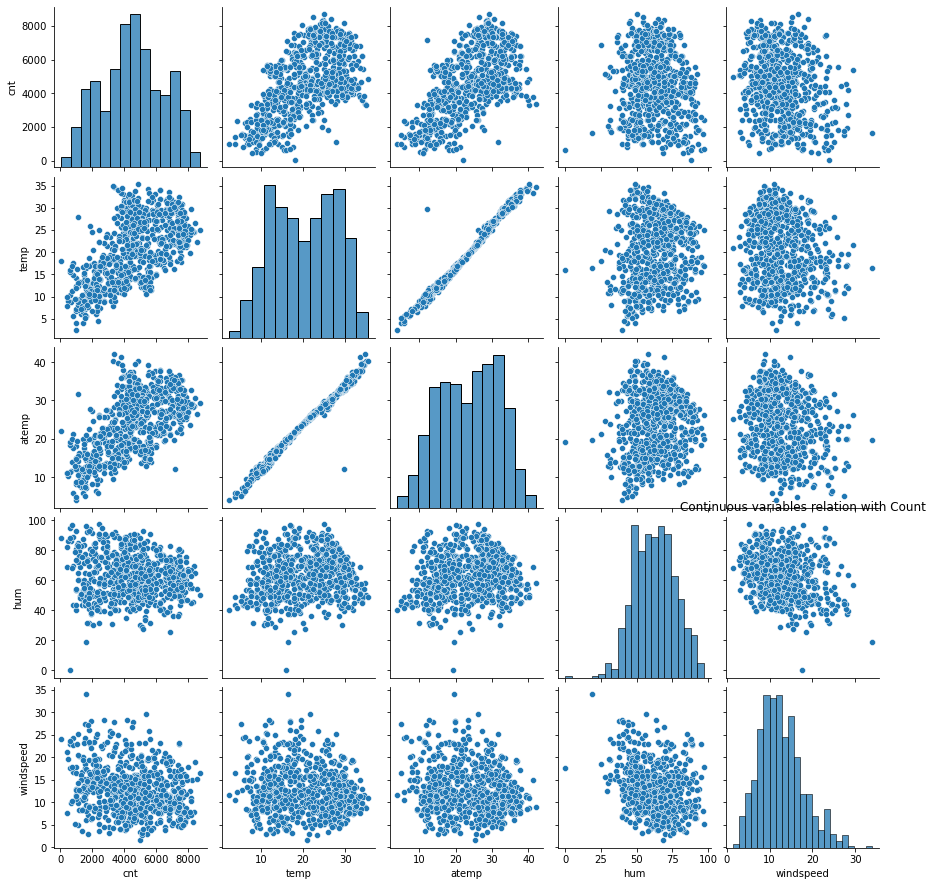

In [2593]:
plt.figure(figsize=(24,16))

sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.title("Continuous variables relation with Count")
plt.show()

### Converting the features into categorical string values 

In [2594]:

df['season']=df['season'].map({1:"spring",2:"summer",3:"fall",4:"winter"})
df['weekday']=df['weekday'].map({0:"sun",1:"mon",2:"tue",3:"wed",4:"thur",5:"fri",6:"sat"})
df['mnth']=df['mnth'].map({1:"jan",2:"feb",3:"mar",4:"aprl",5:"may",6:"jun",7:"jul",8:"aug",9:"sept",10:"oct",11:"nov",12:"dec"})
df['weathersit']=df['weathersit'].map({1:"weather_good",2:"weather_moderate",3:"weather_bad",4:"weather_worse"})




### EDA

#### Season vs Count

Text(0.5, 1.0, 'Season vs Count')

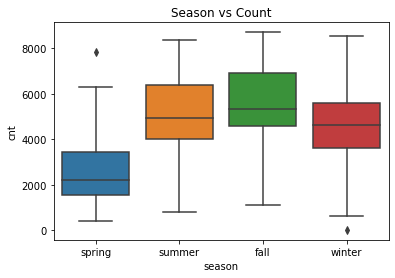

In [2526]:
sns.boxplot(data=df,x='season',y='cnt')
plt.title("Season vs Count")

Fall has highest deamand for bikes and sping has least

#### Year vs Count

Text(0.5, 1.0, 'Year vs Count')

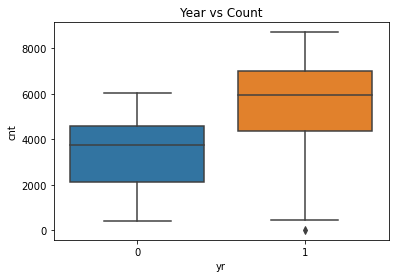

In [2527]:
sns.boxplot(data=df,x='yr',y='cnt')
plt.title("Year vs Count")

Demand for next year (2019) has grown

#### Month vs Count

Text(0.5, 1.0, 'Month vs Count')

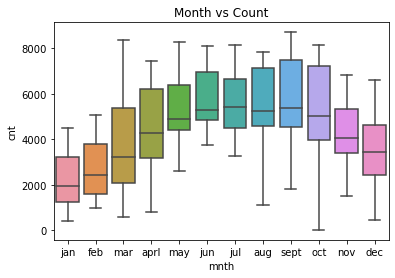

In [2528]:
sns.boxplot(data=df,x='mnth',y='cnt')
plt.title("Month vs Count")

Demand inceased from jan to june and july to oct is constant and in nov and dec slight decrease in demand

#### Holiday vs Count

Text(0.5, 1.0, 'Holiday vs Count')

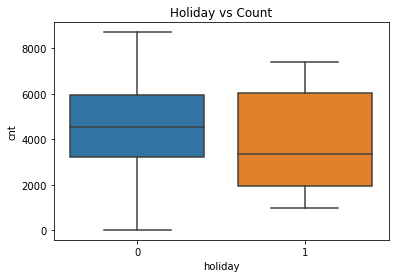

In [2529]:
sns.boxplot(data=df,x='holiday',y='cnt')
plt.title("Holiday vs Count")

During holiday slight decrease in demand

#### weekday vs Count

Text(0.5, 1.0, 'weekday vs Count')

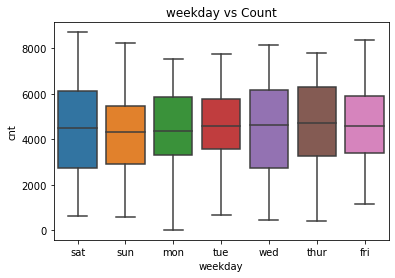

In [2530]:
sns.boxplot(data=df,x='weekday',y='cnt')
plt.title("weekday vs Count")

demand is constant throughout the week 

#### workingday vs Count

Text(0.5, 1.0, 'Workingday vs Count')

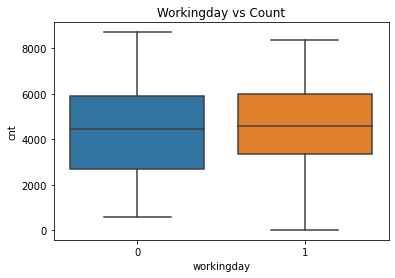

In [2531]:
sns.boxplot(data=df,x='workingday',y='cnt')
plt.title("Workingday vs Count")

#### Weathersituation vs Count

Text(0.5, 1.0, 'Weathersit vs Count')

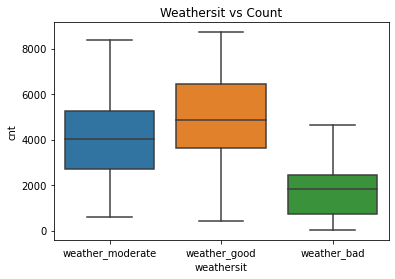

In [2532]:
sns.boxplot(data=df,x='weathersit',y='cnt')
plt.title("Weathersit vs Count")

clear weather has highest demand

#### atemp vs Count

Text(0.5, 1.0, 'atemp vs Count')

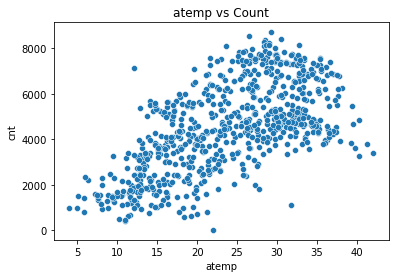

In [2533]:
sns.scatterplot(data=df,x='atemp',y='cnt')
plt.title("atemp vs Count")

Temperature has linear relationship with count

#### Humidity vs Count

Text(0.5, 1.0, 'Humidity vs Count')

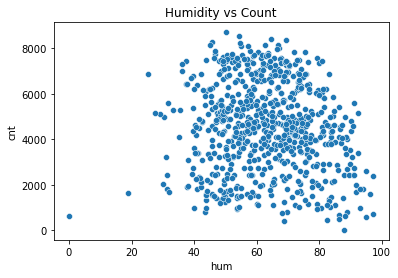

In [2534]:
sns.scatterplot(data=df,x='hum',y='cnt')
plt.title("Humidity vs Count")

#### Windspeed vs Count

Text(0.5, 1.0, 'Windspeed vs Count')

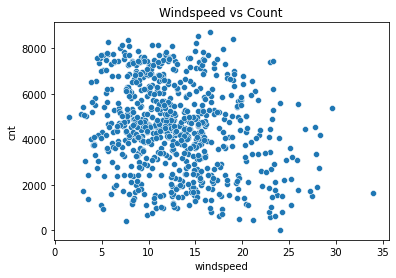

In [2535]:
sns.scatterplot(data=df,x='windspeed',y='cnt')
plt.title("Windspeed vs Count")

Windspeed and humidity has not much linear relationship with count

### Creating dummy variables for categorical variables

In [2596]:
df1=pd.get_dummies(df['season'],drop_first=True)
df1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [2537]:
df2=pd.get_dummies(df['mnth'],drop_first=True)
df3=pd.get_dummies(df['weekday'],drop_first=True)
df4=pd.get_dummies(df['weathersit'])

In [2538]:
#adding the dummy varivables to original data 
df=pd.concat([df,df1,df2,df3,df4],axis=1)

In [2539]:
df=df.drop(['season','mnth','weekday','weathersit'],axis=1)

In [2540]:
df.shape

(730, 31)

### Seperating the data into train and test data

In [2541]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=3)

### Feature scaling

To get continuous varible variables in one scale for easy comparision

In [2542]:
scaler=MinMaxScaler()
num_var=['temp','windspeed','hum','atemp']
df_train[num_var]=scaler.fit_transform(df_train[num_var])

In [2543]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sept,mon,sat,sun,thur,tue,wed,weather_bad,weather_good,weather_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.511765,0.035294,0.666667,0.544442,0.511841,0.642048,0.344415,4536.378431,0.252941,0.229412,...,0.080392,0.149020,0.162745,0.135294,0.133333,0.139216,0.135294,0.025490,0.643137,0.331373
std,0.500352,0.184703,0.471867,0.231359,0.213488,0.145147,0.162247,1968.523402,0.435124,0.420867,...,0.272166,0.356457,0.369495,0.342373,0.340268,0.346511,0.342373,0.157763,0.479544,0.471169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344439,0.332644,0.536953,0.225964,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.538523,0.519376,0.638175,0.317308,4585.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.746847,0.686225,0.746572,0.433925,6033.250000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2544]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thur',
       'tue', 'wed', 'weather_bad', 'weather_good', 'weather_moderate'],
      dtype='object')

In [2545]:
df_train.shape

(510, 31)

#### Seperating data into dependent and independent variables

In [2546]:
y_train=df_train.pop('cnt')

x_train=df_train

In [2547]:
x_train.shape

(510, 30)

### Building the model using RFE

In [2548]:
lm = LinearRegression()
lm.fit(x_train,y_train)
# selecting 15 features using RFE
rfe = RFE(lm,16)
rfe = rfe.fit(x_train,y_train)

In [2549]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('aug', False, 8),
 ('dec', False, 2),
 ('feb', False, 10),
 ('jan', False, 12),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 11),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 5),
 ('sept', False, 3),
 ('mon', False, 4),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thur', False, 15),
 ('tue', False, 9),
 ('wed', False, 14),
 ('weather_bad', True, 1),
 ('weather_good', True, 1),
 ('weather_moderate', True, 1)]

In [2550]:
#columns select by RFE
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'jul', 'nov', 'sat', 'sun', 'weather_bad',
       'weather_good', 'weather_moderate'],
      dtype='object')

In [2551]:
#taking columns selected by RFE in train data 
x_train_rfe = x_train[col]

### Manual elimation using  statsmodel

Manually eliminating the columns which has high VIF and P-value by statsmodel one by one 

#### Model1

In [2552]:
x_train_sm=sm.add_constant(x_train_rfe)
x_train_rfe.head()
lm1 =sm.OLS(y_train,x_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.44e-184
Time:                        00:19:29   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1455.4606    215.166      6.764      0.000    1032.710    1878.211
yr                1991.7436     73.310     27.169      0.000    1847.707    2135.780
holiday            104.2030    165.065      0.631      0.528    -220.111     428.517
workingday         502.7436     77.870      6.456      0.000     349.748     655.740
temp              -331.8929   1991.522     -0.167      0.868   -4244.772    3580.987
atemp             4760.3921   2159.343      2.205      0.028     517.785    9003.000
hum              -1691.0604    340.755     -4.963      0.000   -2360.565   -1021.556
windspeed        -1363.0485    249.592     -5.461      0.000   -1853.439    -872.658
spring           -1107.0667    136.672     -8.100      0.000   -1375.595    -838.539
winter             527.1050    117.557      4.484      0.000     296.134     758.076
jul               -606.1450    157.379     -3.851      0.000    -915.358    -296.932
nov               -352.3381    152.192     -2.315      0.021    -651.361     -53.315
sat                675.7557     98.365      6.870      0.000     482.491     869.020
sun                172.7583    103.606      1.667      0.096     -30.804     376.320
weather_bad       -710.0965    204.360     -3.475      0.001   -1111.616    -308.577
weather_good      1281.9652     88.089     14.553      0.000    1108.890    1455.040
weather_moderate   883.5920    104.564      8.450      0.000     678.148    1089.036
==============================================================================
Omnibus:                       69.839   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.682
Skew:                          -0.697   Prob(JB):                     4.30e-39
Kurtosis:                       5.524   Cond. No.                     2.74e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables

In [2553]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
11,sat,inf
12,sun,inf
13,weather_bad,inf
14,weather_good,inf
15,weather_moderate,inf
4,atemp,166.09
3,temp,165.92
7,spring,2.76


'holiday' high p-value and high VIF. we will remove this and build the model again 


In [2554]:
x=x_train_rfe.drop('holiday',axis=1)
x_train_sm=sm.add_constant(x)
x_train_rfe.head()
lm1 =sm.OLS(y_train,x_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.44e-184
Time:                        00:19:30   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1533.6129    294.088      5.215      0.000     955.798    2111.428
yr                1991.7436     73.310     27.169      0.000    1847.707    2135.780
workingday         398.5406    196.911      2.024      0.044      11.656     785.426
temp              -331.8929   1991.522     -0.167      0.868   -4244.772    3580.987
atemp             4760.3921   2159.343      2.205      0.028     517.785    9003.000
hum              -1691.0604    340.755     -4.963      0.000   -2360.565   -1021.556
windspeed        -1363.0485    249.592     -5.461      0.000   -1853.439    -872.658
spring           -1107.0667    136.672     -8.100      0.000   -1375.595    -838.539
winter             527.1050    117.557      4.484      0.000     296.134     758.076
jul               -606.1450    157.379     -3.851      0.000    -915.358    -296.932
nov               -352.3381    152.192     -2.315      0.021    -651.361     -53.315
sat                571.5527    210.740      2.712      0.007     157.497     985.608
sun                 68.5552    215.327      0.318      0.750    -354.513     491.624
weather_bad       -684.0457    220.307     -3.105      0.002   -1116.899    -251.193
weather_good      1308.0159    102.175     12.802      0.000    1107.266    1508.766
weather_moderate   909.6427    121.977      7.457      0.000     669.986    1149.299
==============================================================================
Omnibus:                       69.839   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.682
Skew:                          -0.697   Prob(JB):                     4.30e-39
Kurtosis:                       5.524   Cond. No.                     6.36e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2555]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,166.09
2,temp,165.92
13,weather_good,63.50
14,weather_moderate,39.31
1,workingday,6.75
10,sat,4.74
12,weather_bad,4.57
11,sun,4.25
6,spring,2.76
7,winter,2.13


'temp' variable has high VIF. we will remove this and build the model again 



In [2556]:
x=x_train_rfe.drop(['holiday','temp'],axis=1)
x_train_sm=sm.add_constant(x)
x_train_rfe.head()
lm1 =sm.OLS(y_train,x_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.74e-185
Time:                        00:19:31   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1530.7021    293.281      5.219      0.000     954.476    2106.928
yr                1992.6838     73.021     27.289      0.000    1849.216    2136.152
workingday         400.9453    196.189      2.044      0.042      15.481     786.410
atemp             4403.8600    292.726     15.044      0.000    3828.723    4978.997
hum              -1685.8808    339.002     -4.973      0.000   -2351.938   -1019.824
windspeed        -1371.7185    243.871     -5.625      0.000   -1850.865    -892.572
spring           -1105.5101    136.218     -8.116      0.000   -1373.146    -837.874
winter             530.0676    116.091      4.566      0.000     301.977     758.158
jul               -608.2939    156.696     -3.882      0.000    -916.164    -300.424
nov               -351.9933    152.029     -2.315      0.021    -650.694     -53.293
sat                573.3923    210.244      2.727      0.007     160.313     986.472
sun                 71.4314    214.424      0.333      0.739    -349.860     492.723
weather_bad       -687.9059    218.872     -3.143      0.002   -1117.936    -257.876
weather_good      1308.9841    101.910     12.845      0.000    1108.757    1509.212
weather_moderate   909.6238    121.857      7.465      0.000     670.204    1149.044
==============================================================================
Omnibus:                       69.470   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.675
Skew:                          -0.694   Prob(JB):                     7.12e-39
Kurtosis:                       5.518   Cond. No.                     2.50e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.68e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2557]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weather_good,63.43
13,weather_moderate,39.23
1,workingday,6.71
9,sat,4.73
11,weather_bad,4.53
10,sun,4.22
2,atemp,3.06
5,spring,2.75
6,winter,2.08
3,hum,1.90


'sun' variable(weekday) has high p-value. we will remove this and build the model again 



In [2558]:
x=x_train_rfe.drop(['holiday','sun','temp'],axis=1)
x_train_sm=sm.add_constant(x)
x_train_rfe.head()
lm1 =sm.OLS(y_train,x_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.23e-186
Time:                        00:19:49   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1576.1192    259.434      6.075      0.000    1066.396    2085.842
yr                1992.0484     72.930     27.314      0.000    1848.759    2135.338
workingday         344.3391     97.978      3.514      0.000     151.837     536.841
atemp             4401.6662    292.391     15.054      0.000    3827.192    4976.140
hum              -1685.9055    338.699     -4.978      0.000   -2351.363   -1020.448
windspeed        -1375.4271    243.398     -5.651      0.000   -1853.644    -897.210
spring           -1107.9046    135.907     -8.152      0.000   -1374.927    -840.882
winter             530.1508    115.987      4.571      0.000     302.266     758.035
jul               -609.5744    156.509     -3.895      0.000    -917.075    -302.074
nov               -354.1847    151.751     -2.334      0.020    -652.337     -56.033
sat                516.9042    124.185      4.162      0.000     272.911     760.897
weather_bad       -671.8655    213.318     -3.150      0.002   -1090.982    -252.748
weather_good      1323.8530     91.533     14.463      0.000    1144.013    1503.693
weather_moderate   924.1317    113.708      8.127      0.000     700.725    1147.539
==============================================================================
Omnibus:                       69.340   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.819
Skew:                          -0.694   Prob(JB):                     1.09e-38
Kurtosis:                       5.511   Cond. No.                     6.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.43e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2559]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weather_good,46.90
12,weather_moderate,30.81
10,weather_bad,3.85
2,atemp,3.06
5,spring,2.74
6,winter,2.08
3,hum,1.90
1,workingday,1.68
9,sat,1.65
8,nov,1.43


'weather_good' variable(weather conditon) has very high VIF. we will remove this build the model again

In [2560]:
x=x_train_rfe.drop(['temp','sun','weather_good','holiday'],axis=1)
x_train_sm=sm.add_constant(x)
x_train_rfe.head()
lm1 =sm.OLS(y_train,x_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     211.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.23e-186
Time:                        00:20:04   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2899.9722    304.606      9.520      0.000    2301.497    3498.447
yr                1992.0484     72.930     27.314      0.000    1848.759    2135.338
workingday         344.3391     97.978      3.514      0.000     151.837     536.841
atemp             4401.6662    292.391     15.054      0.000    3827.192    4976.140
hum              -1685.9055    338.699     -4.978      0.000   -2351.363   -1020.448
windspeed        -1375.4271    243.398     -5.651      0.000   -1853.644    -897.210
spring           -1107.9046    135.907     -8.152      0.000   -1374.927    -840.882
winter             530.1508    115.987      4.571      0.000     302.266     758.035
jul               -609.5744    156.509     -3.895      0.000    -917.075    -302.074
nov               -354.1847    151.751     -2.334      0.020    -652.337     -56.033
sat                516.9042    124.185      4.162      0.000     272.911     760.897
weather_bad      -1995.7185    256.130     -7.792      0.000   -2498.950   -1492.487
weather_moderate  -399.7214     96.148     -4.157      0.000    -588.628    -210.815
==============================================================================
Omnibus:                       69.340   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.819
Skew:                          -0.694   Prob(JB):                     1.09e-38
Kurtosis:                       5.511   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2561]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.84
2,atemp,15.97
4,windspeed,4.90
1,workingday,4.68
5,spring,2.76
6,winter,2.61
11,weather_moderate,2.22
0,yr,2.08
9,sat,1.89
8,nov,1.53


'hum' variable(humidity) has very high VIF. we will remove this build the model again

In [2564]:
x=x_train_rfe.drop(['sun','hum','weather_good','holiday','temp'],axis=1)
x_train_sm=sm.add_constant(x)
x_train_rfe.head()
lm1 =sm.OLS(y_train,x_train_sm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.38e-182
Time:                        00:20:23   Log-Likelihood:                -4142.1
No. Observations:                 510   AIC:                             8308.
Df Residuals:                     498   BIC:                             8359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1922.9107    238.422      8.065      0.000    1454.474    2391.347
yr                2046.1266     73.818     27.718      0.000    1901.093    2191.160
workingday         386.1001     99.921      3.864      0.000     189.781     582.419
atemp             4083.5971    292.054     13.982      0.000    3509.786    4657.408
windspeed        -1005.4081    237.237     -4.238      0.000   -1471.517    -539.299
spring           -1135.2824    138.999     -8.168      0.000   -1408.380    -862.185
winter             430.6274    116.946      3.682      0.000     200.859     660.395
jul               -507.4872    158.820     -3.195      0.001    -819.527    -195.448
nov               -329.2483    155.246     -2.121      0.034    -634.267     -24.230
sat                546.2480    126.972      4.302      0.000     296.781     795.715
weather_bad      -2527.4001    238.287    -10.607      0.000   -2995.572   -2059.229
weather_moderate  -678.0976     80.055     -8.470      0.000    -835.384    -520.811
==============================================================================
Omnibus:                       70.680   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.965
Skew:                          -0.711   Prob(JB):                     6.16e-39
Kurtosis:                       5.502   Cond. No.                         16.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2565]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.21
3,windspeed,4.89
1,workingday,4.62
0,yr,2.07
5,winter,1.99
4,spring,1.93
8,sat,1.87
10,weather_moderate,1.55
7,nov,1.53
6,jul,1.29


Our final model has following features

In [2566]:
x.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'spring', 'winter', 'jul',
       'nov', 'sat', 'weather_bad', 'weather_moderate'],
      dtype='object')

## Model evalution on train data


In [2567]:
#predicted values for train data 
y_train_pred =lm1.predict(x_train_sm)

In [2568]:
#calculating the r2score for train data 
r2=r2_score(y_true=y_train,y_pred=y_train_pred)

r2

0.8283580961511186

#### Histogram of error terms

Text(0.5, 0.98, 'error terms')

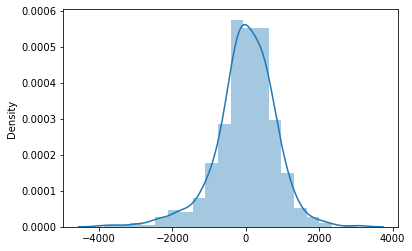

<Figure size 432x288 with 0 Axes>

In [2569]:

sns.distplot(y_train - y_train_pred,bins=20)
fig=plt.figure()
fig.suptitle('error terms')

Errors are normally distributed around the mean

## #

Text(0.5, 1.0, 'Residuals vs predicted values')

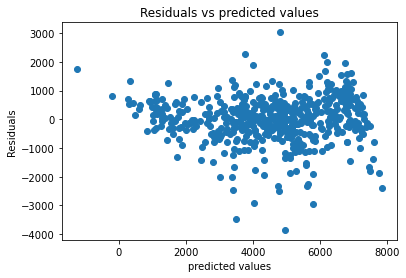

In [2570]:
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.xlabel("predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs predicted values")

No specific pattern observed from grah and variance is constant 

## Model evalution on test data

In [2571]:
num_var1=['temp','windspeed','hum','atemp']

df_test[num_var1]=scaler.transform(df_test[num_var1])


In [2572]:
y_test=df_test.pop('cnt')
df_test=df_test[col]
x_test_sm=sm.add_constant(df_test)



In [2573]:
x_train_rfe.shape
x_train_sm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'windspeed', 'spring', 'winter',
       'jul', 'nov', 'sat', 'weather_bad', 'weather_moderate'],
      dtype='object')

In [2574]:
x_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,winter,jul,nov,sat,sun,weather_bad,weather_good,weather_moderate
175,1.0,0,0,0,0.804861,0.740646,0.497001,0.385880,0,0,0,0,1,0,0,1,0
306,1.0,0,0,1,0.442008,0.429037,0.721936,0.235894,0,1,0,1,0,0,0,1,0
631,1.0,1,0,1,0.575969,0.555827,0.506856,0.247412,0,1,0,0,0,0,0,1,0
107,1.0,0,0,1,0.573859,0.556658,0.557841,0.291040,0,0,0,0,0,0,0,1,0
339,1.0,0,0,1,0.510571,0.495297,0.976435,0.433320,0,1,0,0,0,0,1,0,0


In [2575]:
x_test_sm.shape
x_test_sm.drop(['temp','weather_good','holiday','sun','hum'],axis=1,inplace=True)

In [2576]:
y_test_pred =lm1.predict(x_test_sm)

In [2577]:
#r2score on test data
r2=r2_score(y_true=y_test,y_pred=y_test_pred)

r2

0.8224037103561272

#### Histogram of errors on test data

Text(0.5, 0.98, 'error terms')

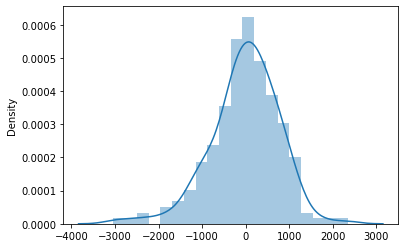

<Figure size 432x288 with 0 Axes>

In [2578]:
sns.distplot(y_test - y_test_pred,bins=20)
fig=plt.figure()
fig.suptitle('error terms')

## Homoscedasticity

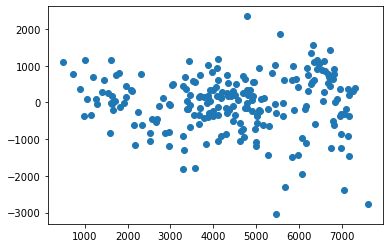

In [2579]:
plt.scatter(y_test_pred,y_test-y_test_pred)

No specific pattern observed from grah and variance is constant 

## Results

#### Final model

y = 1922.91+yr*2046.12+workingday*386.10+atemp*4083.59-windspeed*1005.40-spring*1135.28+winter*430.62-jul*507.48-nov*329.24+sat*546.24-weather_bad*2527.40-weather_moderate*678.09

r2score on train data = 0.8283

r2score on test data = 0.8224

The following variables influance the demand of bikes 


year 

working day

atemp(feeling temperature in Celsius)

windspeed

season(spring,winter)

months(jul,nov)

weekday(sat)

weather situation(moderate(mist+cloudy),bad(snow+thunderstrom))